In [3]:
import tellurium as te
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
%matplotlib inline 

In [80]:
t='dsfnkl'
t.startswith('d')

True

In [100]:
def get_paras_dic(modeltxt):
    dic={}
    model_file=open(modeltxt,'rb')
    print(model_file)
    for line in model_file:
        linespl = line.split()
        
        if (len(linespl)>=5):
#             print(linespl[2])
            if (linespl[1] == '=') & ~(str(linespl[0]).startswith('//')) & ~(str(linespl[0]).endswith("'")):
                dic[linespl[0]] = linespl[2][0:-1] + ' ' +  linespl[4]  
#         print linespl[0:2]
#     csv.reader(modeltxt)
    return dic

In [101]:
modeltxt='volume_reference_radius_tom.txt'
para_dic=get_paras_dic(modeltxt)
para_dic

<open file 'volume_reference_radius_tom.txt', mode 'rb' at 0x7fc1f64a8ed0>


{'E': 'modulus_adjustmen E_3d;',
 'Lp': '1.19e-6 um/s/Pa',
 'R': '8.314 J/mol/K',
 'R_ref': 'r/( (1',
 'T': '303 K',
 'c_i_0': '400 mM',
 'd': '0.115 um',
 'k_deg': 'k_deg_0 for',
 'k_nutrient': 'k_nutrient_0 for',
 'k_nutrient_0': '2.e-16 mM/s/um^2',
 'modulus_adjustment': '(1-nu^2)^(-1 3d',
 'phi': '1.e-14//1.e-4 1/Pa/s',
 'pi_t': '0.20e6 Pa',
 'pi_tc_0': '0.2e6 Pa'}

<open file 'volume_reference_radius.txt', mode 'rb' at 0x7fc1ef435a50>
{'phi': '1.e-4 1/Pa/s', 'E': 'modulus_adjustmen E_3d;', 'd': '0.115 um', 'E_3d': '2.58e Pa', 'r_os': '0. um', 'pi_t': '0.20e6 Pa', 'nu': '0. _', 'k_nutrient': '2.e-1 //', 'R': '8.314 J/mol/K', 'T': '303 K', 'Lp': '1.19e-6 um/s/Pa', 'modulus_adjustment': '(1-nu^2)^(-1) _', 'k_scaling_factor': '1.2 1/um', 'R_ref': 'r/( (1', 'r_b': '0. um', 'pi_tc_0': '0.2e6 Pa'}


['time',
 'V_tot_fl',
 '[c_e]',
 '[c_i]',
 'pi_i',
 'pi_e',
 'R_ref',
 'r',
 'r_os',
 'r_b',
 'pi_t',
 'V_ref']

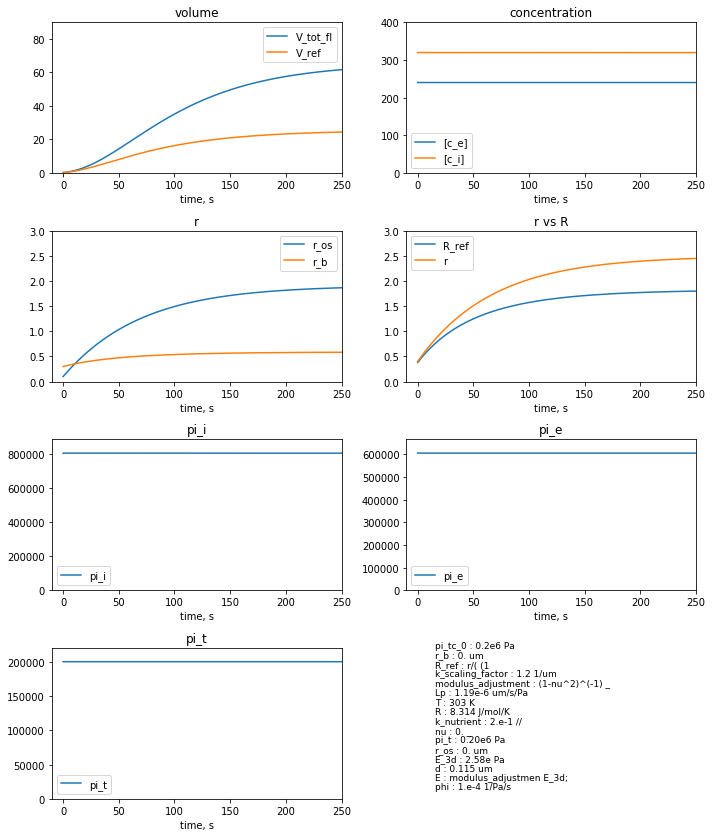

In [112]:
modeltxt='volume_reference_radius.txt'
model=te.loadAntimonyModel(modeltxt)
model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
end_time = 20000
sim=model.simulate(1, end_time, 2000, selections = model_species)

#tom
'''model=te.loadAntimonyModel('volume_tom.txt')
model_species_tom=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e','pi_t',]
sim=model.simulate(1,15000,1000, selections = model_species_tom)
'''



fig1=plt.figure(1, figsize=(10,20))

variables = sim.colnames
number_of_variables = len(variables)
k=0


paras_dic = {}
paras_dic = get_paras_dic(modeltxt)
#             {'r_b': '0.3um' ,
#            'r_os': '0.1 um',
#            'c_e': '240 mM',
#            'c_i' : '319.17 mM',
#            'T': '303 K',
#            'pi_t': '0.2e6 Pa',
#            'pi_tc_0' : '0.2e6 Pa',
#            'd': '115 nm',
#            'phi' : '1.e-4 Pa $s^{-1}$',
#            'nu' : '0.5',
#            'modulus_adjustment': '$4/3$',
#            'E' : 'modulus_adjustment * 2.58e6 Pa',
#            'k_nutrient' : '3.5e-16 mM $s^{-1}$',
#            'k_deg' : '3.8e-16 mM $s^{-1}$',
#            'k_transport' : '0' 
#   }


print(paras_dic)


#seconds [0] or minutes [1]

if 1:
    time = sim['time']/60
    xlim=(-10,250)
else: 
    time = sim['time']
    xlim=(-200, 15000)


def plot_details(sim, var,title='no title', max_y=0):
    plt.plot(time,sim[var], label = var)
    if max_y==0:
        max_y=max(sim[var])*1.1
    plt.title(title)
    plt.xlim(xlim[0], xlim[1])#end_time)
    plt.ylim(0,max_y)
    plt.xlabel('time, s')
    plt.legend()

# Plot

fig1=plt.figure(1, figsize=(10,20))

for var in variables:
    
    if var == 'time':
        continue
    if var.startswith('V'):
        plt.subplot(number_of_variables/2 + 1,2, 1)
        plot_details(sim, var, title='volume',  max_y=90)
        
    elif var.startswith('[c'):
        plt.subplot(number_of_variables/2 + 1,2, 2)
        plot_details(sim, var, title='concentration',  max_y=400)

    elif var.startswith('r_'):
        plt.subplot(number_of_variables/2 + 1,2, 3)
        plot_details(sim, var, title='r',  max_y=3)
 
        #plt.ylim(0,100) 
    elif var in ['r', 'R_ref']:
        plt.subplot(number_of_variables/2 + 1,2, 4)
        plot_details(sim, var,title= 'r vs R',  max_y=3)

    else:    
        k+=1
        plt.subplot(number_of_variables/2 + 1,2, 4+k)
        plot_details(sim, var, title=var, )
        plt.title(var)
        

ax = plt.subplot(number_of_variables/2 + 1,2, 4+k+1)
ax.axis('off')

for pos,key in enumerate(paras_dic):
    ax.text(0.1, 1./len(paras_dic)*(pos+1), key  + ' : ' + paras_dic[key], fontsize=9)
   
    plt.tight_layout()

plt.savefig('plots/simulation__refradius_osmo.png',dpi=300)
variables

In [3]:
model=te.loadAntimonyModel('volume_reference_radius.txt')
model_species=['time','V_tot_fl', '[c_e]', '[c_i]','pi_i','pi_e', 'R_ref', 'r','r_os', 'r_b', 'pi_t', 'V_ref']
end_time = 14400
sim=model.simulate(1, end_time, 1000, selections = model_species)



In [ ]:

def plot_simulation(sim, groups):
    for var in sim.colnames:
        
    
    

In [10]:
groups = {'volume': ['V_tot_fl', 'V_ref'],
          'concentration': ['[c_e]', '[c_i]'],
          'radius': ['r_os', 'r_b']}

In [72]:
sim['time']=sim['time']/60



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
groups.values

<function values>